# The Certified Developer Associate Exam
> My handcrafted notes

- toc: true
- badges: true
- categories: [certification, aws]

* Each region has multiple availability zones (usually 3, min is 2, max is 6)
    - each AZ is one or more discrete data centers with its own redundant power, networking and connectivity
    - AWS currently has 216 points of presence (205 Edge locations, 11 Regional caches) in 84 cities across 42 countries

# IAM

* IAM is a global service. Doesn't require Region selection
* A user can belong to multiple groups
* In AWS you apply the Least Privilege principle. i.e. you don't give more permissions than a user needs


## IAM Policy Structure

It consists of:
    
    - Version
    
    - Id: optional
    
    - Statement: one or more individual statements (required)
        
        * Sid: identifier for the statement (optional)
        * Effect: whether the statement allows or denies access (Allow, Deny)
        * Principal: account/user/role to which this policy applies
        * Action: List of actions this policy allows or denies
        * Resource: List of resources to which this action applies
        * Condition: conditions for when this policy is in effect (optional)
        

* Multi Factor Authentication (MFA) device options in AWS:

- Virtual MFA device (like Google Authenticator)
- Universal 2nd Factor (U2F) Security Key (A physical device)
- Hardware key Fob MFA device
- Hardware Key Fob MFA Device for AWS GovCloud (US)

* IAM roles are a secure way of granting permissions to entities you trust, to perform actions on your behalf. Examples of entities are:

    - IAM user in another account
    - Application code running on Ec2 that needs to perform actions on AWS resources
    - An AWS service that needs to act on resources in your account to provide features
    - Users from a corporate directory who use Identity Federation with SAML
    
* IAM security Tools:

    - IAM Credentials report (account-level)
        * This report lists all your account's users and status of their various credentials
    - IAM Access advisor shows the service permissions granted to each user and when they were last accessed

# EC2

* It is possible to bootstrap instances using an EC2 user data script. It allows you to run commands when your machine starts. That script is only run once at the instance first start. THE EC2 USER DATA SCRIPT RUNS WITH THE ROOT USER.

* Different EC2 instance types are optimised for different use cases. Naming convention:
    
    - m5.2xlarge, m: instance class, 5: generation, 2xlarge: size within the instance class

* Application ports to remember: 
    
    - 22: SSH
    - 21: FTP
    - 22: SFTP (Uploads using SSH)
    - 80: HTTP
    - 443: HTTPS
    - 3389: RDP (Remote Desktop Protocol) - log into Windows instances

* EBS Volume
    
    - It's a network drive
    - It can be detached from an EC2 instance and attached to another quickly
    - It's locked to an Availability Zone (AZ)
    - You can copy snapshots across AZ or region
    - **To move a volume across AZ, you'll need to snapshot it.**
    - An EBS volume cannot be attached to more than 1 EC2 instance at a time
    - However, an EC2 instance can have more than 1 EBS volumes attached to it at the same time
    - It is possible to leave EBS volumes unattached
    - By default, the root EBS volume is deleted
    - By default, any other attached EBS volume is not deleted
    - It's not necessary to detach a volume to do the snapshot, but it's recommended

* EC2 Instance Store

    - EBS volumes are network drives with good but limited performance
    - If you need a high-performance hardware disk, use EC2 instance store (It has high I/O performance)
    - EC2 instance store lose their storage when they're stopped (ephemeral)
    - EC2 instance store is therefore great for buffer/cache/scrath data/temporary content
    
* EBS volume types:

    - gp2/gp3 (SSD): General Purpose SSD volume that balance price and performance for a wide variety of workloads
    - io1/io2 (SSD): Highest-performance SSD volume for mission-critical low-latency or high-throughput workloads
    - st1 (HDD): Low cost HDD volume designed for frequently accessed, throughput-intensive workloads
    - sc2 (HDD): Lowest cost HDD volume designed for less frequently accessed workloads
    - Only gp2/gp3 and io1/io2 can be used as boot volumes
  
  
* EBS Multi Attach:

    - Attach the same EBS volume to multiple EC2 instances in the same AZ
    - Each instance has full read and write permissions to the volume
    - Use case: Achieve higher application availability in clustered Linux applications (ex - Teradata)
    - Must use a file system that is cluster-aware
    
* EFS - Elastic File System

    - Managed NFS that can be mounted on many EC2
    - EFS works with EC2 instances in multiple Availability Zones (AZ)
    - It's highly available, scalable and expensive (3x gp2), pay per use
    - Compatible with Linux based AMI only (Not Windows)
    - Encryption at rest using KMS
    - It has standard file API
    - Throughput 10GB+/s ... can grow to petabyte-scale network file system, automatically
    - Supports Performance (default) and Throughput mode
    - Storage Tiers (lifecycle management feature - move file after N days)
            - Standard: for frequently accessed files
            - Infrequently accessed files (EFS-IA): cost to retrieve files, lower price to store
            
* Load Balancer

    - Classic Load Balancer (v1 - old generation)
        - Supports HTTP, HTTPS, TCP, SSL
        - Health checks are either TCP based or HTTP based
        - You'll get a fixed hostname out of these
        - Supports only one SSL certificate
    - Application Load Balancer (v2 = new generation)
        - HTTP, HTTPS, WebSocket
        - It's a layer 7 load balancer only
        - Load balancing to multiple HTTP applications across machines (target groups)
        - Load balancing to multiple applications on the same machine
        - Support for HTTP/2 and websocket
        - Fixed hostname
        - The application servers don't see the IP of the client directly
            - The true IP of the client is inserted in the header X-Forwarded-For
            - We can also get Port (X-Forwarded-Port) and proto (X-Forwarded-Proto)
        - Supports multiple listeners with multiple SSL certificates. It uses Server Name Indication (SNI) to make it work.
        - Lambda function can be a registered target in a target group of an ALB
        - **You can't attach an Elastic IP address to Application Load Balancers.**
        
    - Network Load Balancer (v2 - new generation)
        - TCP, TLS, UDP
        - Forward TCP & UDP traffic to your instances
        - Handle millions of requests per seconds
        - NLBs are used for extreme performance, TCP or UDP Traffic
        - You can assign 1 fixed IP (static IP) per availability zone to a NLB 
        - Supports multiple listeners with multiple SSL certificates. It uses Server Name Indication (SNI) to make it work.
        
    - Gateway Load Balancer
        - Operates at layer 3 (Network Layer)
        - Deploy, scale and manage a fleet of 3rd party network virtual appliances 
        - If you want all traffic to go through Firewalls, Intrusion Detection and prevention systems, Deep packet inspection, Payload manipulation before it reaches your application, then this LB is used
        - **Uses the GENEVE protocol on port 6081**
        
* Sticky sessions for a load balancer (Session Affinity)
    - It is possible to implement stickiness so that the same client is always redirected to the same instance behind a load balancer
    - This behaviour can be enabled for the CLASSIC Load Balancer and Application Load Balancer
    - The cookie used for stickiness has an expiration date you control
    - Use Case: Make sure the user doesn't lose the session data
    - The cookies can be
        - Application-based cookie (Custom cookie, generated by the target)
            - Can include custom attributes required by the application
            - Cookie name must be specified individually for each target group
            - DON'T use AWSALB, AWSALBAPP or AWSALBTG (reserved for use by the ELB)
        - Application Cookie
            - Generated by the Load Balancer
            - Cookie name is AWSALBAPP
        - Duration-based Cookie
            - Cookie generated by the load balancer
            - Cookie name is AWSALB for ALB and AWSELB for CLB
            

* Cross-Zone balancing
    - It's possible to distribute the traffic evenly across multiple AZ irrespective of how many instances there are within that AZ (with Cross-Zone balancing)
    - It's also possible to distribute the traffic based on the proportion of instances in each AZ (without Cross-Zone balancing)
    
    - Cross-Zone Load Balancing is Always On in an Application Load Balancer (can't be disabled. No charges of Inter AZ-data)
    - Cross-Zone Load Balancing is disabled by default in the Network Load Balancer. You pay charges for inter AZ data if enabled
    - Cross-Zone Load Balancing is disabled by default in the classic Load balancer (No charges for inter AZ data if enabled)

# SSL/TLS - Basics

- SSL = Secure Sockets Layer, used to encrypt connections
- TLS = Transport Layer Security, which is a newer version. Nowadays, TLS certificates are mainly used, but people still refer to them as SSL
- Public SSL certificates are issued by Certificate Authorities (CA)
- The load balancer used an X.509 certificate (or SSL/TLS certificate)
- You can manage certificates using AWS Certificate Manager

# SNI - Server Name Indication

- SNI solves the problem of loading multiple SSL certificates onto one web server (to serve multiple websites)
- It's a newer protocol and requires the client to indicate the hostname of the target server in the initial SSL handshake
- The server will then find the correct certificate, or return the default one
- It only works with Application Load Balancers (ALB) & Network Load Balancers (NLB) and CloudFront. It does NOT work with Classic Load Balancer (CLB)


# Connection Draining

- Known as Connection Draining - For Classic Load Balancer (CLB)
- Known as Deregistration Delay - For ALB and NLB
- The idea is that it will give some time to your instances to complete the In Flight Requests, while the instance is being deregisterd or marked unhealthy
- Once the instance is drained, it will stop sending new requests to the EC2 instance which is being de-registered

# Auto Scaling Group (ASG)

* An ASG contains
    - AMI + Instance Type
    - EC2 user data
    - EBS volumes
    - Security Groups
    - SSH Key Paid

* You can set Min Size/ Max Size / Initial Capacity
* Network + Subnets Information
* Load Balancer Information
* Scaling Policies

## ASG Policies

* Target Tracking Scaling
    - Most simple and easy to set-up
    - Example: I want the average ASG CPU to stay at around 40%
* Simple/Step scaling
    - When a cloudwatch alarm is triggered, e.g. CPU > 70%, then add 2 units
    - When a cloudwatch alarm is triggered, e.g. CPU < 30%, then remove 1 unit
* Scheduled Actions
    - Anticipate a scaling based on usage patterns
* Predictive scaling
    - Forecast usage demand using ML and scale ahead

### Good metrics to scale on

    1. CPUUtilization: Avg CPU utilization across your insances
    2. RequestCountPerTarget: To make sure the number of requests per EC2 instances is stable
    3. Avg Network In/Out
    4. Any custom metric that you can push using CloudWatch

### Auto Scaling Groups - Cooldowns

* After a scaling activity happens, you are in a cooldown period (default 300 seconds)
    - During the cooldown period, the ASG will not launch or terminate additional instances 

# Relational Database Service (RDS)

- You can't SSH into your an RDS instance
* Automated Backups
    - Daily full backup of the database (during the maintenance window)
    - Transaction logs are backed-up by RDS every 5 minutes
        - Ability to restore to any point in time from oldest backup to 5 minutes ago
* DB Snapshots
    - Manually triggered by the user
    - Retention of backup for as long as you want

* RDS - Storage Auto Scaling
    - When RDS detects you are running our of free database storage, it scales automatically
    - You have to set maximum storage theshold (maximum limit for DB storage)

## RDS Read Replica

    - You can create upto 5 Read Replicas
    - Read Replicas can be within AZ, Cross AZ or Cross Region
    - Relication is ASYNCHRONOUS... so reads are eventually consistent
    - Replicas can be promoted to their own DB
    - Read replicas are used only for SELECT (=read) kind of queries. No Insert, Update, Delete is allowed
    - In AWS generally there's a cost when data goes from one AZ to another. **But for RDS Read Replicas, within the same region, you don't pay that fee.**

### RDS Multi AZ (Disaster Recovery)
    - Synchronous replication to a standby instance
    - One DNS name -- automatic failover to standby
    - Failover in case of loss of AZ, loss of network, instance or storage failure
    - No manual intervention is needed in apps
    - Note: Read Replicas can be setup as Mutli AZ for disaster recovery
    
### RDS Security - Encryption

    * At rest encrypption
        - Possibility to encrypt the master and read replicas with AWS KMS - AES-256 encryption
        - Encryption has to be defined at launch time
        - If the master is not encrypted, the read replicas cannot be encrypted
        - You can also enable Transparent Data Encryption (TDE) available for Oracle and SQL server
        
    * In-flight encryption
        - SSL certificates to encrypt data to RDS in flight
        - Provide SSL options with trust certificate when connecting to database
        - To enforce SSL:
            * PostgreSQL: rds.force_ssl=1 in the AWS RDS Console (Parameter Groups)
            * MySQL: Within the DB:
                    GRANT USAGE ON *.* TO 'mysqluser'@'%' REQUIRE SSL;

    * Encrypting RDS backups
        - Snapshots of un-encrypted RDS databases are un-encrypted
        - Snapshots of encrypted RDS databases are encrypted
    
    * To encrypt an un-encrypted RDS database:
        - Create a snapshot of the un-encrypted database
        - Copy the snapshot and enable encryption for the snapshot
        - Restore the database from the encrypted snapshot
        - Migrate the application to the new database, and delete the old database
        

### Aurora High Availability and Read Scaling

    * 6 copies of your data across 3 AZ
        - 4 copies out of 6 are needed for writes
        - 3 copies out of 6 are needed for reads
    * Automated failover for master in less than 30 seconds
    * You can have Master + upto 15 Aurora Read Replicas (have to choose while creating the DB)
    * Support Cross Region Relication
    * Aurora provides 
            - Writer Endpoints --> An Endpoint that always points to the master
            - Reader Endpoints --> An Endpoint for READ requests. Takes care of autoscaling and loadbalancing Read Replicas

## Elasticache

    * Managed service for Redis and Memcached
    * In memory databases with really high performance, low latency
    * Helps reduce load off of databases and read intensive workloads
    * AWS takes care of OS maintenance/patching, optimizations, setup, configuration, failover recovery and backups
    
    * REDIS
        - Multi AZ with Auto-Failover
        - Read Replicas to scale reads and have high availability
        - Backup and restore features
    * MEMCACHED
        - Multi-node for partitioning of data (sharding)
        - No high availability (replication)
        - Non persistent
        - No backup and restore
        - Multi-threaded architecture
        
    * Caching Strategies
        - Lazy Loading / Cache-Aside / Lazy Population
            * Pros:
                    1. Only requested data is cached (cache doesn't have unused data)
                    2. Node failovers are not fatal
            * Cons:
                    1. Cache miss penalty that results in 3 round trips
                    2. Stale data: Data can be updated in the database but outdated in the cache
        - Write Though: Add or update cache when database is updated
            * Pros:
                    1. Data in cache is never stale
                    2. Write penalty requires 2 calls as compared to 3 calls for cache miss penalty in Lazy loading
                    
            * Cons:
                    1. Missing data until it's added/updated in the cache
                    2. A lot of data in the cache may not be read
                    
    * Cache Evictions and Time-to-live (TTL)
            * Cache eviction can occur in three ways:
                    1. You delete the item explicitly from the cache
                    2. Item is evicted because the memory is full and it's not recently used (LRU)
                    3. You set an item time-to-live (TTL)

# Route 53

    - The only service AWS provides that has 100% SLA
    - Record Types:
        * A - maps a hostname to IPv4
        * AAAA - maps a hostname to IPv6
        * CNAME - maps a hostname to another hostname
        * NS - Name Servers for the Hosted Zone

## CNAME vs Hostname
    
    - Route 53 - Alias Records
        - AWS Resources (Load Balancer, Cloudfront) expose an AWS hostname... but you want myapp.mydomain.com
        - CNAME points a hostname to any other hostname... only works for non root domain
    
    - Alias:
        - points a hostname to an AWS resource
        - works for ROOT DOMAIN and NON ROOT DOMAIN
        - An extension of the DNS functionality
        - Automatically recognizes changes in the resource's IP address
        - Alias record is always of type A/AAAA for AWS resources
        - Route 53 - Alias Records Target
            1. CloudFront Distributions
            2. API Gateway
            3. Elastic Beanstalk
            4. S3 Websites
            5. VPC Interface Endpoints
        
        - **You CANNOT set an ALIAS record for an EC2 DNS name**

# Route 53 - Routing Policies

* It defines how Route 53 responds to DNS queries (Not to be confused with the word routing.. DNS doesn't route any traffic, it only responds to DNS queries)
* Route 53 supports the following Routing policies:
    - Simple
    - Weighted
    - Failover
    - Latency based
    - Geolocation
    - Multi-value answer
    - Geoproximity
    

# Virtual Private Cloud (VPC)

- A private network to deploy your resources within the cloud
- **VPC is a regional resource**
- Subnets allow you to partition your network inside your VPC (**Subnet is an AZ resource**)
- A public subnet is a subnet that is accessible from the internet. 
- Internet Gateways help our VPC instances connect with the internet. Public subnets have a route to the internet gateway
- NAT Gateways (AWS-managed) & NAT instances (self-managed) allow your instances in your **Private Subnets** to access the internet while remaining private 

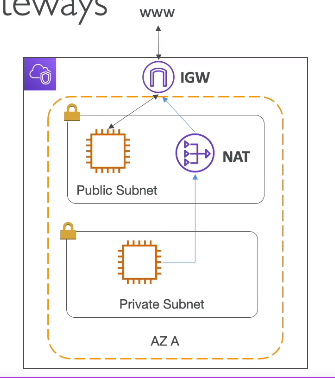

In [5]:
from IPython.display import Image
Image("/home/tanmay/Pictures/training/vpc_nat.png")

## Network ACL and Security groups

* A firewall which controls traffic from and to subnet
* Can have allow or deny rules
* Rules only include IP addresses
* The default NACL allows everything IN and everything OUT 

* Security group is a firewall that controls traffic to and from an ENI/EC2 instance
* Can have only allow rules
* Rules include IP addreses and other security groups

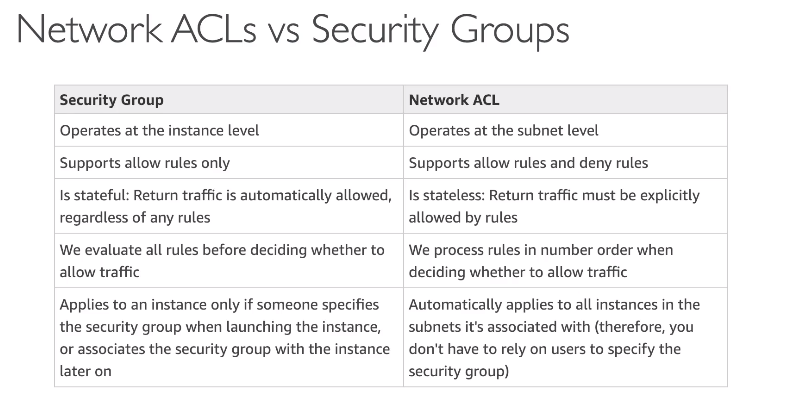

In [6]:
Image("/home/tanmay/Pictures/training/nacl_vs_sg.png")

## VPC Flow Logs

- You can capture information about the IP traffic flowing through your interfaces
    - VPC Flow logs

    - Subnet Flow Logs
    
    - Elastic Network Interface Flow Logs

## VPC Peering

* Connect two VPC, privately using AWS' network
* Make them behave as if they were in the same network
* Must not have overlapping CIDR (IP address range)
* VPC peering connection is not transitive (must be established for each VPC that need to communicate with each other)

# VPC Endpoints

* Endpoints allow you to connect to AWS services from within your VPC using a private network instead of the public www network
* This gives you enhanced security and lower latency to acces AWS services
* VPC Endpoint Gateway: This is only for S3 and DynamoDB
* VPC Endpoint Interface: The rest of the services

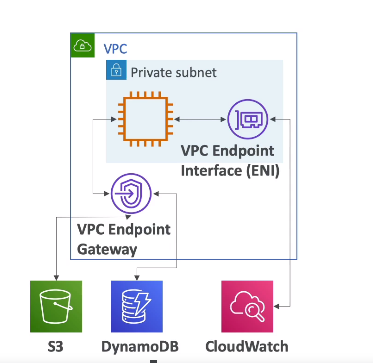

In [7]:
Image("/home/tanmay/Pictures/training/vpc_endpoints.png")

## Site to site VPN and Direct Connect

* Connect an on-premises VPN to AWS
* The connection is automatically encrypted
* Goes over the public internet

## Direct Connect

* Establish a physical connection between on-premises and AWS
* The connection is private, secure and fast
* Goes over a private network
* Takes some time to establish (~1 month)

### NOTE:

Site-to-site VPN and Direct Connect cannot access VPC endpoints

## VPC Summary

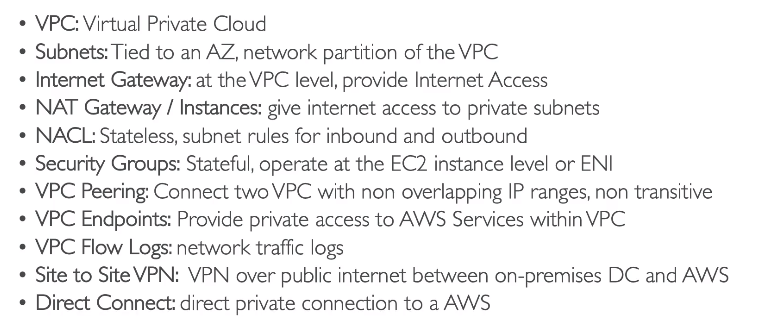

In [9]:
Image("/home/tanmay/Pictures/training/vpc_summary.png")

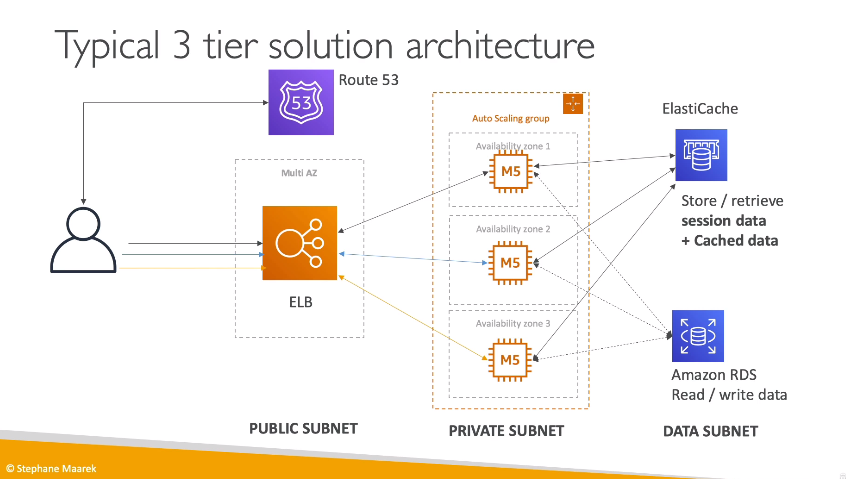

In [10]:
Image("/home/tanmay/Pictures/training/three_tier_architecture.png")